 Accuracy is the proportion of correct answers in the test.\
 Accuracy does not account for the cost of errors.\
 False positive and false negative results equally reduce accuracy.\
 Accuracy is not applicable in cases of an imbalance between positive and negative results.\
 False positive and false negative cases should be analyzed separately.

 False Positive (FP) - incorrect identification of a disease in a healthy person (Type I error in statistics). %FP (FPRate) = FP / Negative_real.\
 False Negative (FN) - incorrect identification of a sick person as healthy (Type II error in statistics). %FN (FNRate) = FN / Positive_real.\
 True Positive (TP) TPRate = TP / Positive_real. Sensitivity metric. Accuracy for positive results. 1 - FNRate.\
 True Negative (TN) TNRate = TN / Negative_real. Specificity metric. Accuracy for negative results. 1 - FPRate.

 https://en.wikipedia.org/wiki/Receiver_operating_characteristic more about identifications\
 https://en.wikipedia.org/wiki/Confusion_matrix - about confusion matrix

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data upload

In [4]:
def generate_ab_test_data(num_samples=10000):
    np.random.seed(42)
    data = {
        'y_true': np.random.randint(0, 2, num_samples),
        'y_pred_1': np.random.randint(0, 2, num_samples),
        'y_pred_2': np.random.randint(0, 2, num_samples)
    }
    df = pd.DataFrame(data)
    return df

In [5]:
ab_test_data = generate_ab_test_data(10000)
print(ab_test_data.head())

   y_true  y_pred_1  y_pred_2
0       0         0         0
1       1         1         1
2       0         0         1
3       0         1         1
4       0         1         0


# Errors rate

In [6]:
print('Count of errors first test :',len(ab_test_data[ab_test_data['y_true'] != ab_test_data['y_pred_1']]))

Count of errors first test : 5030


In [7]:
print('Total number of observations :', len(ab_test_data))

Total number of observations : 10000


In [8]:
print('Errors rate first test :',len(ab_test_data[ab_test_data['y_true'] != ab_test_data['y_pred_1']])/len(ab_test_data))

Errors rate first test : 0.503


In [9]:
print('Errors rate first test :', (ab_test_data['y_true'] != ab_test_data['y_pred_1']).mean())

Errors rate first test : 0.503


In [10]:
print('Errors rate second test :',(ab_test_data['y_true'] != ab_test_data['y_pred_2']).mean())

Errors rate second test : 0.494


# Accuracy

In [11]:
print('Accuracy score first test:',accuracy_score(ab_test_data['y_true'], ab_test_data['y_pred_1']))

Accuracy score first test: 0.497


In [12]:
print('Accuracy score second test:',accuracy_score(ab_test_data['y_true'], ab_test_data['y_pred_2']))

Accuracy score second test: 0.506


# Positive and negative

In [13]:
positives = ab_test_data[ab_test_data['y_true'] == 1].copy()

In [14]:
negatives = ab_test_data[ab_test_data['y_true'] == 0].copy()

## False negative rate

In [15]:
print('False negative rate first test :',(positives['y_true'] != positives['y_pred_1']).mean())

False negative rate first test : 0.5037096450772007


In [16]:
print('False negative rate second test :',(positives['y_true'] != positives['y_pred_2']).mean())

False negative rate second test : 0.49027471425706837


## False positive rate

In [17]:
print('False positive rate first test :',(negatives['y_true'] != negatives['y_pred_1']).mean())

False positive rate first test : 0.50229403550768


In [18]:
print('False positive rate second test :',(negatives['y_true'] != negatives['y_pred_2']).mean())

False positive rate second test : 0.49770596449231996


# Sensitivity

In [19]:
accuracy_score(positives['y_true'],positives['y_pred_1'])

0.49629035492279927

In [20]:
accuracy_score(positives['y_true'],positives['y_pred_2'])

0.5097252857429316

# Specificity

In [21]:
accuracy_score(negatives['y_true'],negatives['y_pred_1'])

0.49770596449231996

In [22]:
accuracy_score(negatives['y_true'],negatives['y_pred_2'])

0.50229403550768

# Sensitivity and specificity as functions

In [23]:
recall_score(ab_test_data['y_true'],ab_test_data['y_pred_1'])

0.49629035492279927

In [24]:
recall_score(ab_test_data['y_true'],ab_test_data['y_pred_2'])

0.5097252857429316

In [25]:
recall_score(ab_test_data['y_true'],ab_test_data['y_pred_1'], pos_label=0)

0.49770596449231996

In [26]:
recall_score(ab_test_data['y_true'],ab_test_data['y_pred_2'], pos_label=0)

0.50229403550768

# Confusion matrix

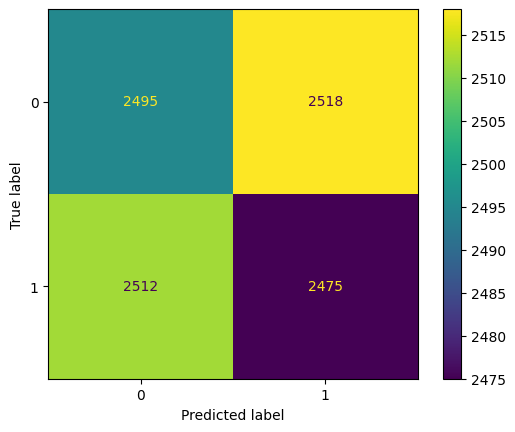

In [31]:
cm = confusion_matrix(ab_test_data['y_true'], ab_test_data['y_pred_1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

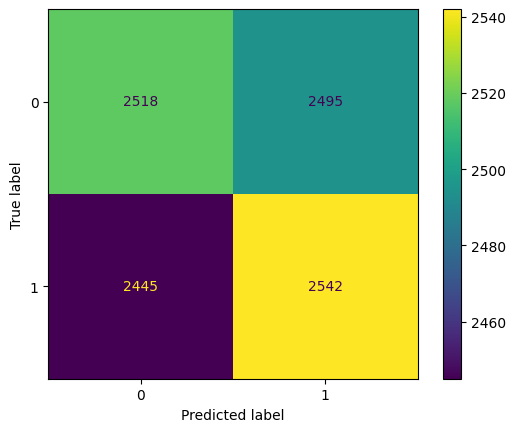

In [32]:
cm = confusion_matrix(ab_test_data['y_true'], ab_test_data['y_pred_2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [ ]:
confusion_matrix(ab_test_data['y_true'], ab_test_data['y_pred_1'])

array([[2495, 2518],
       [2512, 2475]])

In [34]:
tn, fp, fn, tp = confusion_matrix(ab_test_data['y_true'], ab_test_data['y_pred_1']).ravel()

In [35]:
tn, fp, fn, tp 

(np.int64(2495), np.int64(2518), np.int64(2512), np.int64(2475))